# A Guided Project on the Exploration Ebay Car Sales Data.

The aim of this project is to clean the data and analyze the included used car listings for common trends.

The dataset was originally scraped and uploaded to Kaggle. Then dataquest.io made a few modifications from the original dataset that was uploaded to Kaggle:

1. Dataquest sampled 50,000 data points from the full dataset, to ensure your code runs quickly.

2. Dataquest dirtied the dataset a bit to more closely resemble what you would expect from a scraped dataset (the version uploaded to Kaggle was cleaned to be easier to work with).




The data dictionary provided with data is as follows:

dateCrawled - When this ad was first crawled. All field-values are taken from this date.

name - Name of the car.

seller - Whether the seller is private or a dealer.

offerType - The type of listing

price - The price on the ad to sell the car.

abtest - Whether the listing is included in an A/B test.

vehicleType - The vehicle Type.

yearOfRegistration - The year in which the car was first registered.

gearbox - The transmission type.

powerPS - The power of the car in PS.

model - The car model name.

kilometer - How many kilometers the car has driven.

monthOfRegistration - The month in which the car was first registered.

fuelType - What type of fuel the car uses.

brand - The brand of the car.

notRepairedDamage - If the car has a damage which is not yet repaired.

dateCreated - The date on which the eBay listing was created.

nrOfPictures - The number of pictures in the ad

postalCode - The postal code for the location of the vehicle.

lastSeenOnline - When the crawler saw this ad last online.

### Importing the dataset

In [1]:
# importing the needed libraries
import pandas as pd
import numpy as np

autos = pd.read_csv('autos.csv', encoding = 'Latin-1')


In [2]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [3]:
autos.info()
autos.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999,test,kleinwagen,1998,manuell,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


1. The autos.csv dataset has 371528 rows and 20 columns. The pandas datatype in this datasets are 
    - Object (13)
    - int64  (7)

2. Some columns have null values, but none have more than ~20% null values.

3. The size of this dataset is 56.7MB

4. The column names use camelcase instead of Python's preferred snakecase, which means I have to figure out a way to make it uniform.

In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'year_of_registration', 'gearbox', 'power_ps', 'model',
       'kilometer', 'month_of__registration', 'fuel_type', 'brand',
       'not_repaired_Damage', 'date_created', 'nr_of_pictures', 'postal_code',
       'last_seen']
 

I made modifications to the autos.columns array (which prints an array of existing colum names) because some of the names in the column are camel case and snake case. 

### Initial exploration and cleaning
I would use the following methods which are helpful for exploring the data: 
- DataFrame.describe() (with include='all' to get both categorical and numeric columns) 

- Series.value_counts() and Series.head() if any columns need a closer look.

I need to get an idea of the data in each column, my approach will be;
- Any columns that have mostly one value will be dropped
- Identify any columns that need more investigation.
- Identify any column that has numeric data stored as text that then clean them.


In [6]:
# Using the dataframe.describe 

autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of__registration,fuel_type,brand,not_repaired_Damage,date_created,nr_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


I would to perform more investigation on both the 'price' and 'kilometer' columns. This is to make sure all inputs are numeric.

Also using the seires.value_counts on some selected columns I can see the columns which has mostly one value


In [7]:
autos['offer_type'].value_counts()


Angebot    371516
Gesuch         12
Name: offer_type, dtype: int64

In [8]:
autos['seller'].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

Both the 'seller' and 'offer_type' columns have one value which has the most count.

In [9]:
autos['price'].head(50)

0       480
1     18300
2      9800
3      1500
4      3600
5       650
6      2200
7         0
8     14500
9       999
10     2000
11     2799
12      999
13     2500
14    17999
15      450
16      300
17     1750
18     7550
19     1850
20    10400
21     3699
22     2900
23      450
24      500
25     2500
26     5555
27     6900
28     1990
29      690
30     3300
31      899
32      245
33    18000
34     3500
35      350
36     1600
37     1500
38    11900
39     1500
40        0
41     7500
42    12500
43     6990
44     3900
45      590
46     7999
47     2100
48     7750
49    13500
Name: price, dtype: int64

### Exploring the kilometer and price columns
In exploring these columsn I will analyze using minimum and maximum values and look for any values that look unrealistically high or low (outliers) that I might want to remove.


In [10]:
# To see how many unique values are there in the price column of the dataset
autos['price'].unique().shape

(5597,)

In [11]:
# To see some descriptive statistics for the 'price' column
autos['price'].describe()

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64

From the statistics above I can see that the mean is 17,290. Also from the percentiles I can see some usefull insights. One thing that is disturbing is the fact that the maximum value is 2.14e+09, which I believe is an outlier. 

So I can use Series.sort_index() with ascending= True or False to view the highest and lowest values with their counts

In [12]:
# Doing this I have
autos['price'].value_counts().sort_index(ascending=True)

# Notice that the length of the array is the same as before

0             10778
1              1189
2                12
3                 8
4                 1
5                26
7                 3
8                 9
9                 8
10               84
11                5
12                8
13                7
14                5
15               27
16                2
17                5
18                3
19                3
20               51
21                1
24                1
25               33
26                1
27                1
29                2
30               55
32                1
33                1
35               18
              ...  
745000            2
780000            1
820000            1
849000            1
911911            1
999990            1
999999           13
1000000           5
1010010           1
1111111           2
1234566           1
1250000           2
1300000           1
1600000           2
2795000           1
2995000           1
3890000           1
3895000           1
9999999           3


From these observations I'd like to define a lower bound and upper bound such that if the price in the 'price' column is below the lower bound the index is removed and if it is above the the upper bound the index is remove also.

In [13]:
# Defining my lower bound and upper bound (note that these values are arbitrary)
lower_bound = 0.1
upper_bound = 0.95

# Defining a varible which capture my lower and upper boud data
res = autos['price'].quantile([lower_bound, upper_bound])
res

0.10      500.0
0.95    19790.0
Name: price, dtype: float64

From my results the 0.1 quantile value is 500.0 and the .95 quantile value is 19,790. So I have:
500.00 < price and price < 19790.0 

as the boundary and I will define a varible called true_index which takes the index of the values I am interested in and the variable false_index whixh has the index of the values I am not interested in. 


In [14]:
# So this code implements the boundary conditions
true_index = (res.loc[lower_bound] < autos['price'].values)& \
(autos['price'].values <res.loc[upper_bound])
true_index
# The False outputs means that the value in that price index does not met my boudary conditions

array([False,  True,  True, ...,  True,  True, False])

In [15]:
# The false_index will be the opposite of my true_index
false_index = ~true_index
false_index

array([ True, False, False, ..., False, False,  True])

In [16]:
# So the updated prices without outliers is 
new_autos_index = autos['price'][true_index]
new_autos_index

1         18300
2          9800
3          1500
4          3600
5           650
6          2200
8         14500
9           999
10         2000
11         2799
12          999
13         2500
14        17999
17         1750
18         7550
19         1850
20        10400
21         3699
22         2900
25         2500
26         5555
27         6900
28         1990
29          690
30         3300
31          899
33        18000
34         3500
36         1600
37         1500
          ...  
371494    11500
371496     3850
371497     4900
371498      699
371499      600
371501     3900
371502     1600
371503     1700
371504     2600
371505      800
371506     5900
371507     5999
371508     1400
371509     1900
371510     6500
371511     1999
371512     5000
371513     4400
371514      999
371515     1690
371516     1490
371517     7900
371518     3999
371519     5250
371520     3200
371521     1150
371523     2200
371524     1199
371525     9200
371526     3400
Name: price, Length: 311

In [17]:
# now plotting a histogram to see how the distrubution is
new_autos_plot = new_autos_index.plot.hist()

From the the histogram, it is easy to see that most car prices are in range 1000 to 2500. 


Now, doing the same for the 'kilometer' of the dataset.
I start by firstly knowing the number of unique values for this column using the series.unique().shape attribute.

In [18]:
# To get the number of unique values
autos['kilometer'].unique().shape

(13,)

In [19]:
# Next I will use the series.describe() to get some descriptive statistics
autos['kilometer'].describe()

count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

From the output above, I can see that the mean kilometer value is 125618.689 and the max value is 150000.00 which is close to the mean. From this I believe there are outliers.
Although I would like to use same boundary conditions as used for the price to make sure no outliers exists.

In [20]:
# Before that I would like to get an idea of the 
#highest to lowest values with there count
# Doing this I have
autos['kilometer'].value_counts().sort_index(ascending=True)

5000        7069
10000       1949
20000       5676
30000       6041
40000       6376
50000       7615
60000       8669
70000       9773
80000      11053
90000      12523
100000     15920
125000     38067
150000    240797
Name: kilometer, dtype: int64

In [21]:
# Using the same boudary conditions I can 
#get my desired data set by doing this

# Defining my lower bound and upper bound (note that these values are arbitrary)
lower_bound_kilo = 0.05
upper_bound_kilo = 0.95

# Defining a varible which capture my lower and upper boud data
res_kilo = autos['kilometer'].quantile([lower_bound_kilo, upper_bound_kilo])
res_kilo

0.05     30000.0
0.95    150000.0
Name: kilometer, dtype: float64

Looking at my output, 0.1 quantile is 6000 and 7069 of the dataset has a kilometer value of 5000. So I decided not use this boundary conditions as but to use 0.05 quantile.

In [22]:
# So this code implements the boundary conditions
true_index_kilo = (res_kilo.loc[lower_bound_kilo] < autos['kilometer'].values)& \
(autos['kilometer'].values <res_kilo.loc[upper_bound_kilo])
true_index_kilo
# The False outputs means that the value in that price index does not met my boudary conditions

array([False,  True,  True, ..., False, False,  True])

In [23]:
# The false_index will be the opposite of my true_index
false_index_kilo = ~true_index_kilo
false_index_kilo

array([ True, False, False, ...,  True,  True, False])

In [24]:
new_autos_kilo = autos['kilometer'][true_index_kilo]
new_autos_kilo

1         125000
2         125000
4          90000
7          40000
14         70000
20        100000
26        125000
27         60000
36         70000
43        100000
44         80000
45        125000
48        100000
50        125000
57         80000
58        125000
63         70000
64        100000
65         50000
66         50000
76         40000
80         80000
84        100000
89         60000
95         60000
98         40000
100       125000
104        50000
112       100000
113       125000
           ...  
371404    125000
371405     90000
371410    125000
371411     60000
371412    125000
371413     60000
371428    125000
371438    100000
371440     90000
371445    125000
371455     60000
371457     70000
371463    125000
371467     70000
371471    100000
371472     90000
371474     80000
371480    125000
371482    125000
371483     60000
371484    100000
371489    125000
371490    125000
371492    100000
371494    125000
371495    125000
371496    125000
371503     700

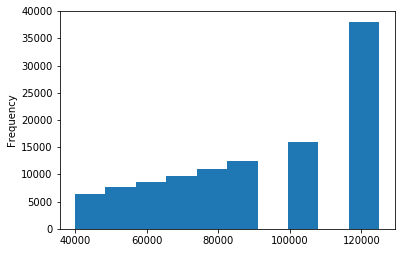

In [25]:
# now plotting a histogram to see how the distrubution is
new_autos_plotkilo = new_autos_kilo.plot.hist()

From the the histogram, it is easy to see that most car prices are in range 110000 to 150000. 


 ### Exploring the date columns
 
Moving on to the date columns and trying to understand the date range the data covers.

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. I can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `date_created`: from the website
- `month_of__registration`: from the website
- `year_of_registration`: from the website




In [26]:
# Taking a look at the dataset to see
#the format of the values in these columns 
#and how pandas reads each columns

autos.head()
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
date_crawled              371528 non-null object
name                      371528 non-null object
seller                    371528 non-null object
offer_type                371528 non-null object
price                     371528 non-null int64
abtest                    371528 non-null object
vehicle_type              333659 non-null object
year_of_registration      371528 non-null int64
gearbox                   351319 non-null object
power_ps                  371528 non-null int64
model                     351044 non-null object
kilometer                 371528 non-null int64
month_of__registration    371528 non-null int64
fuel_type                 338142 non-null object
brand                     371528 non-null object
not_repaired_Damage       299468 non-null object
date_created              371528 non-null object
nr_of_pictures            371528 non-null int64
postal_code  

Right now, the date_crawled, last_seen, and ad_created columns are all identified as string values (object) by pandas.

Because these three columns are represented as strings, I need to convert the data into a numerical representation so I can understand it quantitatively. 

The other two columns are represented as numeric values, so I can use methods like Series.describe() to understand the distribution without any extra data processing.

I want to understand how the values in the three string columns are formatted. These columns all represent full timestamp values,so:


In [27]:
autos[['date_crawled','date_created','last_seen']][0:5]

,date_crawled,date_created,last_seen
0,2016-03-24 11:52:17,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,2016-03-31 00:00:00,2016-04-06 10:17:21


I noticed that the first 10 characters represent the day (e.g. 2016-03-12). To understand the date range, I can extract just the date values using Series.value_counts() to generate a distribution, and then sort by the index.

To select the first 10 characters in each column, I can use Series.str[:10]:


In [28]:
# Defining the varible for each of the first 10 characters in 
# date in the string columns 
date_crawled_date = autos['date_crawled'].str[:10]

date_created_date = autos['date_created'].str[:10]

last_seen_date = autos['last_seen'].str[:10]

In [29]:
# To get an understanding of the distribution in
#each columns in terms of percetage instead of counts 
# and to  include missing values in the distrubution
# The .sort_index is added to rank the date in asceding order.


date_crawled_percent = date_crawled_date.value_counts(normalize=True, dropna=False).sort_index()
type(date_crawled_percent)
date_crawled_percent

2016-03-05    0.025551
2016-03-06    0.014462
2016-03-07    0.035690
2016-03-08    0.033454
2016-03-09    0.034210
2016-03-10    0.032563
2016-03-11    0.032727
2016-03-12    0.036194
2016-03-13    0.015735
2016-03-14    0.036275
2016-03-15    0.033451
2016-03-16    0.030148
2016-03-17    0.031661
2016-03-18    0.013127
2016-03-19    0.035292
2016-03-20    0.036353
2016-03-21    0.035739
2016-03-22    0.032469
2016-03-23    0.031971
2016-03-24    0.029912
2016-03-25    0.032934
2016-03-26    0.031965
2016-03-27    0.030275
2016-03-28    0.035112
2016-03-29    0.034170
2016-03-30    0.033529
2016-03-31    0.031885
2016-04-01    0.034116
2016-04-02    0.035079
2016-04-03    0.038735
2016-04-04    0.037612
2016-04-05    0.012823
2016-04-06    0.003163
2016-04-07    0.001620
Name: date_crawled, dtype: float64

From the exploration of the date_crawled column, I can observe that most of the data were crawled in March 2016 and all the data were crawled between march and april 2016.

In [30]:
date_created_percent = date_created_date.value_counts(normalize=True, dropna=False).sort_index()
type(date_created_percent)
p = pd.DataFrame([date_created_percent])
pt = p.T
pt
pt['date']= pt.index


#### ISSUE From the exploration of the [

In [31]:
last_seen_percent = last_seen_date.value_counts(normalize=True, dropna=False).sort_index()
type(last_seen_percent)
last_seen_percent

2016-03-05    0.001292
2016-03-06    0.004134
2016-03-07    0.005262
2016-03-08    0.008056
2016-03-09    0.009994
2016-03-10    0.011563
2016-03-11    0.013046
2016-03-12    0.023401
2016-03-13    0.008489
2016-03-14    0.012301
2016-03-15    0.016411
2016-03-16    0.016419
2016-03-17    0.028760
2016-03-18    0.006931
2016-03-19    0.016314
2016-03-20    0.019915
2016-03-21    0.020136
2016-03-22    0.020607
2016-03-23    0.018149
2016-03-24    0.019237
2016-03-25    0.019097
2016-03-26    0.016160
2016-03-27    0.016909
2016-03-28    0.022273
2016-03-29    0.023312
2016-03-30    0.023856
2016-03-31    0.024238
2016-04-01    0.024022
2016-04-02    0.025016
2016-04-03    0.025366
2016-04-04    0.025654
2016-04-05    0.126206
2016-04-06    0.217830
2016-04-07    0.129648
Name: last_seen, dtype: float64

From the exploration of the last_seen_percent column, I can observe that most of the data were last seen in March and all the data were crawled between march and april

### Dealing with incorrect Registration year data


In [32]:
autos['year_of_registration'].describe()

count    371528.000000
mean       2004.577997
std          92.866598
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: year_of_registration, dtype: float64

Most of the cars sales are 2005-2006 model. There seems to be outliers in the year of registeration data (cos of the odd values of 1000, 1999). To deal with this, I will define a lower bound and upper bound to help find 10% and 95% qunatiles 

In [33]:
# Defining my lower bound and upper bound (note that these values are arbitrary)
lower_bound = 0.1
upper_bound = 0.95

# Defining a varible which capture my lower and upper boud data
res_year = autos['year_of_registration'].quantile([lower_bound, upper_bound])
res_year

0.10    1995.0
0.95    2016.0
Name: year_of_registration, dtype: float64

From this, I would take any values below 1995 as invalid and any values above 2016 has invalid also. So I will remove the values outside those upper and lower bounds and calculate the distribution of the remaining values using Series.value_counts(normalize=True).


In [34]:
# So this code implements the boundary conditions
true_year_index = (res_year.loc[lower_bound] < autos['year_of_registration'].values)& \
(autos['year_of_registration'].values <res_year.loc[upper_bound])
true_year_index
# The False outputs means that the value in that price index does not met my boudary conditions

array([False,  True,  True, ...,  True,  True,  True])

In [35]:
new_year_of_reg = autos['year_of_registration'][true_year_index].value_counts(normalize=True).sort_index()
new_year_of_reg

1996    0.035154
1997    0.047489
1998    0.057968
1999    0.073520
2000    0.079281
2001    0.065289
2002    0.061966
2003    0.064175
2004    0.063765
2005    0.072064
2006    0.065328
2007    0.057071
2008    0.052233
2009    0.050399
2010    0.039894
2011    0.038971
2012    0.030413
2013    0.019883
2014    0.015507
2015    0.009630
Name: year_of_registration, dtype: float64

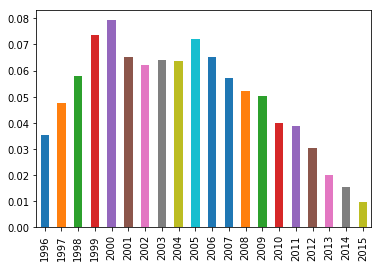

In [36]:
new_year_of_reg.plot.bar()

From the bar chat above, It is obvious that most of the vehicles were registered in year 2000

### Exploring price by brand

In [37]:
#brand_list = autos['brand'].value_counts()
#my_brand_list = brand_list[0:19]

#my_brand_list.sum()
#brand_index = my_brand_list.index 
#my_brand_list
# Perfroming the aggregation now

#my_brand_dict = {} #empty dict for aggregation
#for brand in brand_index:
#    my_brand_dict[brand] = 
#    print(brand)

#my_brand_dict

The Brand columns cotains the types of cars. I want to understand this column using aggregation. Using that, I want aggregate over the top 20 brands in the dataset. Which are:

When working with data on `cars`, it's natural to explore variations across different car brands. We can use aggregation to understand the `brand` column, since cars comes in different brands.

step 1:Explore the unique values in the brand column, and decide on which brands you want to aggregate by.
You might want to check this out [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to better understand why i had to set normalize to true. And if that doesn't explain it well, check this out, it is a practical approach .. [here](https://dfrieds.com/data-analysis/value-counts-python-pandas)

In [38]:
#Unique value counts for a column:
brand_list = autos['brand'].value_counts(normalize=True)
brand_list

volkswagen        0.214358
bmw               0.108401
opel              0.108030
mercedes_benz     0.095037
audi              0.088481
ford              0.068832
renault           0.048365
peugeot           0.029680
fiat              0.026044
seat              0.018900
mazda             0.015329
skoda             0.015183
smart             0.014128
citroen           0.013948
nissan            0.013558
toyota            0.012634
sonstige_autos    0.010718
hyundai           0.009814
mini              0.009135
volvo             0.008955
mitsubishi        0.008239
honda             0.007633
kia               0.006877
alfa_romeo        0.006312
suzuki            0.006266
porsche           0.005962
chevrolet         0.004966
chrysler          0.003908
dacia             0.002422
jeep              0.002172
daihatsu          0.002169
subaru            0.002097
land_rover        0.002073
jaguar            0.001671
trabant           0.001591
daewoo            0.001459
saab              0.001427
r

VolkSwagen is by far the most popular and it is almost equal the sum of the next two listings(bmw and opel), some of the brands have really less percent uniqueness, we might have to drop them.<br>
step 2: <b><em>You might want to select the top 20, or you might want to select those that have over a certain percentage of the total values (e.g. > 5%).</em></b>
<br>
step 2b : <b>Remember that Series.value_counts() produces a series with index labels, so you can use Series.index attribute to access the labels, should you wish.</b> <br>
1. To do this, you first want to sample out the the common ones... those with percentage >5%



In [39]:
#select those with percent greater than 5%
common_car_brand = brand_list[brand_list > .05].index
common_car_brand

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [46]:
#or if you decide to select the top twenty
common_car_brand2 = brand_list[:21]
common_car_brand2
#i will keep working with the >5% thingy


volkswagen        0.214358
bmw               0.108401
opel              0.108030
mercedes_benz     0.095037
audi              0.088481
ford              0.068832
renault           0.048365
peugeot           0.029680
fiat              0.026044
seat              0.018900
mazda             0.015329
skoda             0.015183
smart             0.014128
citroen           0.013948
nissan            0.013558
toyota            0.012634
sonstige_autos    0.010718
hyundai           0.009814
mini              0.009135
volvo             0.008955
mitsubishi        0.008239
Name: brand, dtype: float64

<b>Step 3: Create an empty dictionary to hold your aggregate data.</b>

In [47]:
selected_brand_mean = {} #empty dictionary
#Loop over your selected brands
#and assign the mean price to the dictionary - how do i get the mean price? i also need the name of the brand as key for my dictionary, so i will first have to get the brand names and save
for brand in common_car_brand:
    brand_only = autos[autos["brand"] == brand]
brand_only
    

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,year_of_registration,gearbox,power_ps,model,kilometer,month_of__registration,fuel_type,brand,not_repaired_Damage,date_created,nr_of_pictures,postal_code,last_seen
8,2016-04-04 23:42:13,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500,control,bus,2014,manuell,125,c_max,30000,8,benzin,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
15,2016-03-11 21:39:15,KA_Lufthansa_Edition_450_VB,privat,Angebot,450,test,kleinwagen,1910,NaN,0,ka,5000,0,benzin,ford,NaN,2016-03-11 00:00:00,0,24148,2016-03-19 08:46:47
18,2016-03-23 15:48:05,Ford_C_MAX_2.0_TDCi_DPF_Titanium,privat,Angebot,7550,test,bus,2007,manuell,136,c_max,150000,6,diesel,ford,nein,2016-03-23 00:00:00,0,88361,2016-04-05 18:45:11
73,2016-03-05 16:45:05,Ford_Fiesta,privat,Angebot,750,control,kleinwagen,2002,manuell,50,fiesta,150000,4,benzin,ford,nein,2016-03-05 00:00:00,0,70327,2016-03-11 06:16:00
84,2016-03-09 21:46:09,Ford_Escort_CLX,privat,Angebot,600,test,limousine,1994,manuell,75,escort,100000,6,benzin,ford,ja,2016-03-09 00:00:00,0,37359,2016-04-05 23:44:25
89,2016-03-08 13:49:57,Fiesta_Titanium_1.25,privat,Angebot,6800,control,kleinwagen,2009,manuell,82,fiesta,60000,12,benzin,ford,nein,2016-03-08 00:00:00,0,51065,2016-04-05 19:18:01
94,2016-03-16 07:56:19,FORD_KA___TÜV_ABGELAUFEN,privat,Angebot,250,control,NaN,2000,NaN,60,ka,150000,0,NaN,ford,NaN,2016-03-16 00:00:00,0,51427,2016-03-21 09:47:08
102,2016-03-28 00:56:46,Ford_Focus_Turnier_1.6_TDCi_DPF,privat,Angebot,1500,control,kombi,2006,manuell,109,focus,150000,10,diesel,ford,nein,2016-03-27 00:00:00,0,74223,2016-04-02 11:47:00
108,2016-03-20 12:59:39,Ford_Escort_Cabrio,privat,Angebot,300,test,cabrio,1992,manuell,105,escort,150000,0,NaN,ford,ja,2016-03-20 00:00:00,0,88515,2016-04-06 13:15:58
127,2016-03-27 12:36:18,Ford_Focus_1_6l*Klima*TÜV*,privat,Angebot,1750,test,limousine,2002,manuell,75,focus,125000,1,benzin,ford,nein,2016-03-27 00:00:00,0,33330,2016-03-27 12:36:18


In [48]:
#the output returns all columns name specific/useful for our selected common brand...
#meanwhile what we need is the price column of this brands. so let us extract the price column too
#our for loop increases to 
for brand in common_car_brand:
    brand_only = autos[autos["brand"] == brand]
    brand_mean_prices = brand_only["price"].mean()
brand_mean_prices

8462.054706135377

In [49]:
#now we move on to adding our values to the dictionary... remember that the the instruction says the key is the brand name... 
#remember dictionary...
#{key:value} pair
#so to complete the forloop.. we have
for brand in common_car_brand:
    brand_only = autos[autos["brand"] == brand]
    brand_mean_price = brand_only["price"].mean()
    selected_brand_mean[brand] = int(brand_mean_price)
selected_brand_mean #print your dictionary


{'volkswagen': 14533,
 'bmw': 14844,
 'opel': 3223,
 'mercedes_benz': 17244,
 'audi': 15868,
 'ford': 8462}